# CAMEX could achieve more accurate integration and annotation performance in both relatives and distant species


This tutorial demonstrates that CAMEX could achieve more accurate integration and annotation performance in both relatives and distant species. 

Here, we use collected scRNA-seq data from four species: adult human visual cortex, frontal cortex, and cerebellum, mouse neocortex, as well as lizard and turtle pallium. Processed h5ad files can be downloaded from https://drive.google.com/drive/folders/1rwdjEvWFEFw82a0x2JzMi2jXICbUc5eb?usp=sharing

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
print(sys.path)
sys.path.append('E:\\学习\\5药物研发\\靶点发现\\下游任务\\单细胞\\跨物种\\came\\CAMEX\\CAMEX\\')

['E:\\学习\\5药物研发\\靶点发现\\下游任务\\单细胞\\跨物种\\came\\CAMEX\\CAMEX\\analysis\\4cortex_annotation', 'C:\\Users\\10360\\anaconda3\\envs\\py38\\python38.zip', 'C:\\Users\\10360\\anaconda3\\envs\\py38\\DLLs', 'C:\\Users\\10360\\anaconda3\\envs\\py38\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py38', '', 'C:\\Users\\10360\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py38\\lib\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py38\\lib\\site-packages\\win32', 'C:\\Users\\10360\\anaconda3\\envs\\py38\\lib\\site-packages\\win32\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py38\\lib\\site-packages\\Pythonwin']


In [3]:
import os
import time
import torch
import shutil
import warnings
import argparse
import importlib
import scanpy as sc

import pandas as pd
import numpy as mp

from CAMEX.base import Dataset
from CAMEX.trainer import Trainer

In [4]:
from params import PARAMS

In [5]:
t1 = time.time()

## make log dir

In [6]:
time_start = time.strftime("%Y-%m-%d-%H-%M-%S")
log_path = f'./log/{time_start}/'
for k, v in PARAMS.items():
    v['time_start'] = time_start
    v['log_path'] = log_path
print(log_path)

./log/2025-06-14-10-39-23/


In [7]:
os.makedirs(log_path, exist_ok=True)
shutil.copy('params.py', log_path + 'params_current.py')
print(f'time: {time_start}')

time: 2025-06-14-10-39-23


## preprocess scRNA_seq data to construct a heterogeneous graph of cells and genes

In [8]:
#  —————————————————————————————————— 1 preprocess
print('start preprocess')
dataset = Dataset(**PARAMS['preprocess'])
# torch.save(dataset, log_path + 'dataset_preprocessed.pt')
# dataset = torch.load(f'{args.path}/log/2023-06-06-09-02-45/dataset_preprocessed.pt')
adata_CAMEX = dataset.adata_whole
dgl_data = dataset.dgl_data

start preprocess
                                raw-brain-human-Lake: reference  raw-brain-mouse-Chen: query  raw-brain-lizard-Tosches: query  raw-brain-turtle-Tosches: query
excitatory neuron                                       14747.0                        906.0                           1910.0                           7151.0
inhibitory neuron                                        6808.0                       1392.0                            242.0                           1490.0
oligodendrocyte                                          4369.0                       3724.0                            551.0                            155.0
cerebellar granule cell                                  3298.0                          NaN                              NaN                              NaN
astrocyte                                                2524.0                       1757.0                            520.0                           6514.0
oligodendrocyte precursor cel

In [9]:
print('start train')
trainer = Trainer(adata_CAMEX, dgl_data, **PARAMS['train'])

start train


## integration

In [10]:
trainer.integration()

--------------------------------------------- integration ---------------------------------------------
epoch: 0, loss: 88.19321090792432
epoch: 1, loss: 26.90171910509651
epoch: 2, loss: 26.61919125215507
epoch: 3, loss: 26.456716372642987
epoch: 4, loss: 26.36408836458936
epoch: 5, loss: 26.273979987627193
epoch: 6, loss: 26.22034063456971
epoch: 7, loss: 26.136304831799166
epoch: 8, loss: 26.09897893740807
epoch: 9, loss: 26.08717859527211


## annotation

In [11]:
trainer.annotation()

--------------------------------------------- annotation ---------------------------------------------
epoch: 0, loss: 88.01263552904129
train_acc: {'raw-brain-human-Lakecell_acc': 0.9388}, test_acc: {'raw-brain-lizard-Toschescell_acc': 0.933, 'raw-brain-mouse-Chencell_acc': 0.6207, 'raw-brain-turtle-Toschescell_acc': 0.9275}, train_ami:{'raw-brain-human-Lakecell_ami': 0.6674, 'raw-brain-lizard-Toschescell_ami': 0.7326, 'raw-brain-mouse-Chencell_ami': 0.5929, 'raw-brain-turtle-Toschescell_ami': 0.6558}, best_epoch: 0
epoch: 1, loss: 55.156198382377625
train_acc: {'raw-brain-human-Lakecell_acc': 0.9442}, test_acc: {'raw-brain-lizard-Toschescell_acc': 0.9368, 'raw-brain-mouse-Chencell_acc': 0.7285, 'raw-brain-turtle-Toschescell_acc': 0.9235}, train_ami:{'raw-brain-human-Lakecell_ami': 0.6667, 'raw-brain-lizard-Toschescell_ami': 0.7578, 'raw-brain-mouse-Chencell_ami': 0.6837, 'raw-brain-turtle-Toschescell_ami': 0.6535}, best_epoch: 1
epoch: 2, loss: 53.2356573343277
train_acc: {'raw-brain

In [12]:
adata_CAMEX.write_h5ad(log_path + 'adata_CAMEX.h5ad', compression='gzip')

In [13]:
t2 = time.time()

In [14]:
print(f'time usage: {round(t2-t1)} seconds')

time usage: 1841 seconds


# analysis

In [15]:
log_path

'./log/2025-06-14-10-39-23/'

In [16]:
adata_CAMEX = sc.read_h5ad(log_path + 'adata_CAMEX.h5ad')
adata_CAMEX

AnnData object with n_obs × n_vars = 69985 × 2000
    obs: 'cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'dataset_name', 'donor', 'organ', 'organism', 'platform', 'region', 'tSNE1', 'tSNE2', 'batch', 'n_genes_by_counts', 'total_counts', 'cell_ontology_class_num', 'cell_class', 'cell_class_num'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'cell_type', 'data_order', 'dataset_description', 'dataset_type', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_CAMEX_Annotation', 'X_CAMEX_Annotation_eval', 'X_CAMEX_Integration', 'X_pca', 'cell_train_class'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## integration

In [47]:
adata_CAMEX.obs.head(5)

,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,organ,organism,platform,region,tSNE1,tSNE2,batch,n_genes_by_counts,total_counts,cell_ontology_class_num,cell_class,cell_class_num,cell_type_pred
index,,,,,,,,,,,,,,,,,,
Gran_cbm1_TTAATCAGTCGC,cerebellar granule cell,CL:0001031,Gran,Lake_2018,1,Brain,Homo sapiens,snDrop-seq,cbm,-26.725456,-30.189707,raw-brain-human-Lake,708,1090.0,3,cerebellar granule cell,3,cerebellar granule cell
Gran_cbm1_ACAACGACATCC,cerebellar granule cell,CL:0001031,Gran,Lake_2018,1,Brain,Homo sapiens,snDrop-seq,cbm,-31.022097,-22.272980,raw-brain-human-Lake,646,915.0,3,cerebellar granule cell,3,cerebellar granule cell
Gran_cbm1_TATGTCTATATG,cerebellar granule cell,CL:0001031,Gran,Lake_2018,1,Brain,Homo sapiens,snDrop-seq,cbm,-35.684959,-24.031462,raw-brain-human-Lake,701,1053.0,3,cerebellar granule cell,3,cerebellar granule cell
Gran_cbm1_TAATGGAAAATA,cerebellar granule cell,CL:0001031,Gran,Lake_2018,1,Brain,Homo sapiens,snDrop-seq,cbm,-25.886816,-33.706535,raw-brain-human-Lake,715,1115.0,3,cerebellar granule cell,3,cerebellar granule cell
Gran_cbm1_CTGGACTACAGC,cerebellar granule cell,CL:0001031,Gran,Lake_2018,1,Brain,Homo sapiens,snDrop-seq,cbm,-25.068712,-36.672504,raw-brain-human-Lake,651,960.0,3,cerebellar granule cell,3,cerebellar granule cell


In [48]:
adata_CAMEX.obsm['X_CAMEX_Integration'].shape

(69985, 128)

In [49]:
sc.pp.neighbors(adata_CAMEX, use_rep='X_CAMEX_Integration')

In [50]:
sc.tl.umap(adata_CAMEX)

In [51]:
palette_batch = {'raw-brain-human-Lake': '#FB7800', 'raw-brain-mouse-Chen': '#D62728',
                 'raw-brain-lizard-Tosches': '#31C4C9', 'raw-brain-turtle-Tosches': '#894EA1'}

In [52]:
palette_cell = {'cerebellar granule cell': '#D1352B',
                'ependymal cell': '#9B5B33',
                'endothelial cell': '#EE934E',
                'brain pericyte': '#FFFF32',
                'astrocyte': '#CCCC33',
                'oligodendrocyte': '#BBDD78',
                'oligodendrocyte precursor cell': '#7DBFA7',
                'macrophage': '#3C77AF',
                'excitatory neuron': '#AECDE1',
                'inhibitory neuron': '#F5CFE4',
                'neural progenitor cell': '#A71AB9',
                'microglial cell': '#B383B9',
                'Purkinje cell': '#D67475',}

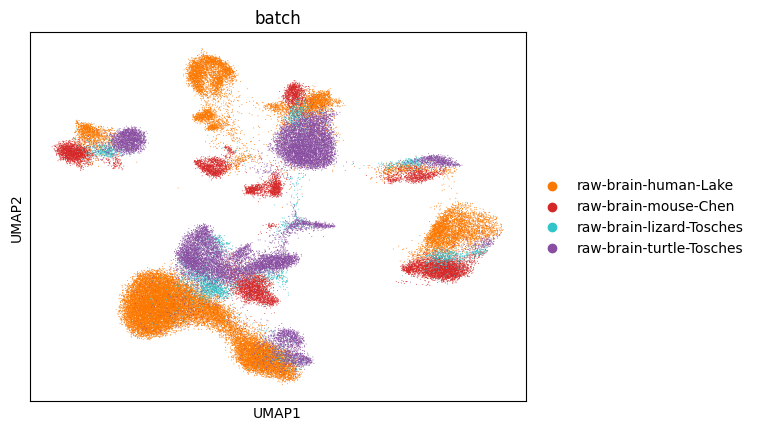

In [53]:
sc.pl.umap(adata_CAMEX, color=['batch'], wspace=0.6, palette=palette_batch)

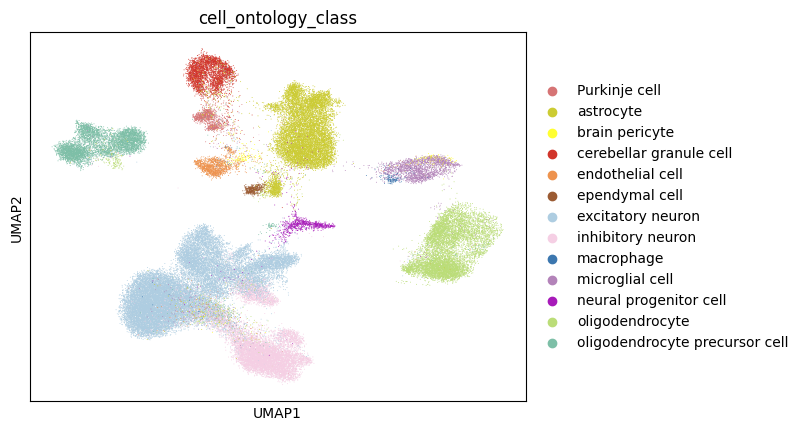

In [54]:
sc.pl.umap(adata_CAMEX, color=['cell_ontology_class'], wspace=0.6, palette=palette_cell)

## annotation

In [55]:
adata_CAMEX

AnnData object with n_obs × n_vars = 69985 × 2000
    obs: 'cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'dataset_name', 'donor', 'organ', 'organism', 'platform', 'region', 'tSNE1', 'tSNE2', 'batch', 'n_genes_by_counts', 'total_counts', 'cell_ontology_class_num', 'cell_class', 'cell_class_num', 'cell_type_pred'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'cell_type', 'data_order', 'dataset_description', 'dataset_type', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'batch_colors', 'cell_ontology_class_colors', 'cell_type_pred_colors'
    obsm: 'X_CAMEX_Annotation', 'X_CAMEX_Annotation_eval', 'X_CAMEX_Integration', 'X_pca', 'cell_train_class', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [56]:
adata_CAMEX.uns['cell_type']

{'Purkinje cell': 6,
 'astrocyte': 4,
 'brain pericyte': 9,
 'cerebellar granule cell': 3,
 'endothelial cell': 8,
 'ependymal cell': 11,
 'excitatory neuron': 0,
 'inhibitory neuron': 1,
 'macrophage': 12,
 'microglial cell': 7,
 'neural progenitor cell': 13,
 'oligodendrocyte': 2,
 'oligodendrocyte precursor cell': 5,
 'unknown': 10}

In [57]:
cell_type_d = {v: k for k, v in adata_CAMEX.uns['cell_type'].items()}
cell_type_d

{6: 'Purkinje cell',
 4: 'astrocyte',
 9: 'brain pericyte',
 3: 'cerebellar granule cell',
 8: 'endothelial cell',
 11: 'ependymal cell',
 0: 'excitatory neuron',
 1: 'inhibitory neuron',
 12: 'macrophage',
 7: 'microglial cell',
 13: 'neural progenitor cell',
 2: 'oligodendrocyte',
 5: 'oligodendrocyte precursor cell',
 10: 'unknown'}

In [58]:
import torch
import numpy as np
y_true = adata_CAMEX.obs['cell_ontology_class_num'].to_numpy().astype(np.int)
y_prob = torch.nn.Softmax(dim=-1)(torch.tensor(adata_CAMEX.obsm['cell_train_class'])).numpy() 
y_pred = np.argmax(y_prob, axis=-1).astype(np.int)
adata_CAMEX.obs.loc[:, 'cell_type_pred'] = [cell_type_d[item] for item in y_pred]
adata_CAMEX

AnnData object with n_obs × n_vars = 69985 × 2000
    obs: 'cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'dataset_name', 'donor', 'organ', 'organism', 'platform', 'region', 'tSNE1', 'tSNE2', 'batch', 'n_genes_by_counts', 'total_counts', 'cell_ontology_class_num', 'cell_class', 'cell_class_num', 'cell_type_pred'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'cell_type', 'data_order', 'dataset_description', 'dataset_type', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'batch_colors', 'cell_ontology_class_colors', 'cell_type_pred_colors'
    obsm: 'X_CAMEX_Annotation', 'X_CAMEX_Annotation_eval', 'X_CAMEX_Integration', 'X_pca', 'cell_train_class', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [61]:
sc.pp.neighbors(adata_CAMEX, use_rep='X_CAMEX_Annotation')

In [62]:
sc.tl.umap(adata_CAMEX)

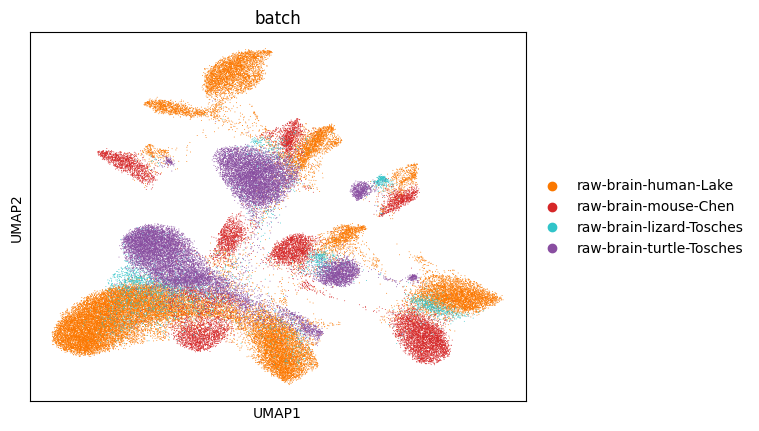

In [63]:
sc.pl.umap(adata_CAMEX, color=['batch'], wspace=0.6, palette=palette_batch)

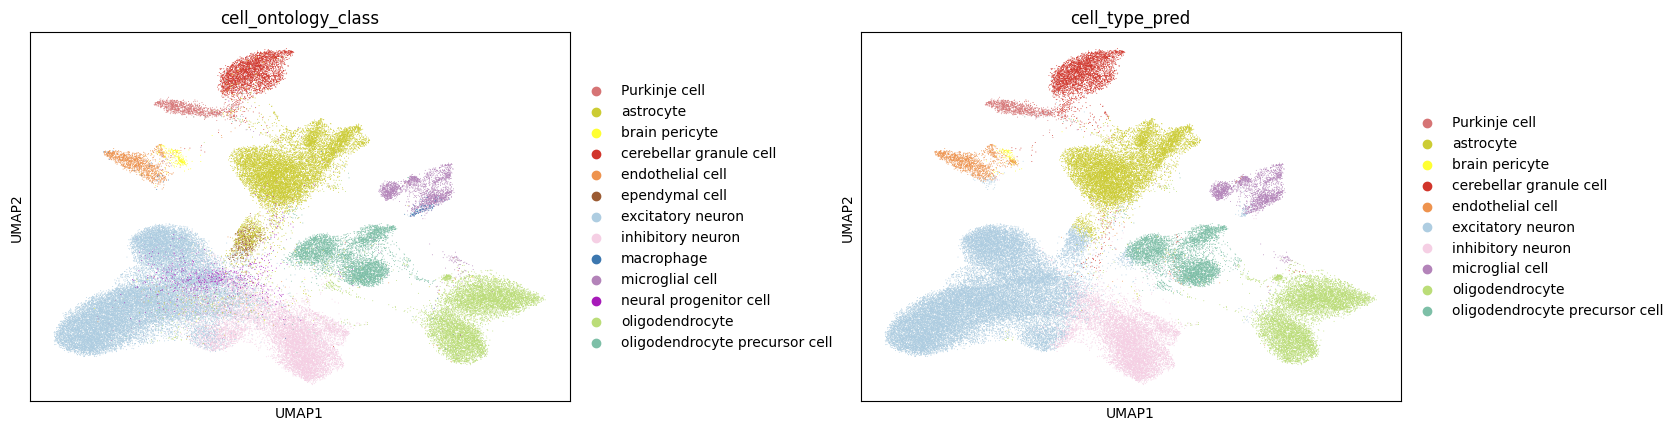

In [64]:
sc.pl.umap(adata_CAMEX, color=['cell_ontology_class', 'cell_type_pred'], wspace=0.4, palette=palette_cell)